In [ ]:
!pip install "paddleocr>=2.0.1"
!python -m pip install paddlepaddle==2.4.2 -i https://mirror.baidu.com/pypi/simple

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 445.9/445.9 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 44.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.9/60.9 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.1/67.1 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 61.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.9/8.9 MB 68.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 813.9/813.9 kB 44.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.3/88.3 kB 9.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 148.4/148.4 kB 16.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.0/3.0 MB 79.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━

In [ ]:
import cv2
import torch as torch
import torchvision as tv
from paddleocr import PaddleOCR as ppocr
from paddleocr import draw_ocr
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import os
import glob
import json
import numpy as np
import pandas as pd
import cv2
import math
from PIL import Image
from google.colab.patches import cv2_imshow
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!which python
!python --version
!python -m ensurepip
!python -m pip --version

/usr/local/bin/python
Python 3.9.16
/usr/bin/python3: No module named ensurepip
pip 23.0.1 from /usr/local/lib/python3.9/dist-packages/pip (python 3.9)


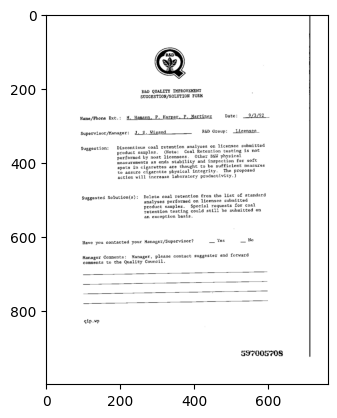

In [ ]:
img = cv2.imread('/content/drive/MyDrive/PaddleOCR/ip_work/training_data/images/0000971160.png')
plt.imshow(img)
plt.show()

In [ ]:
# function to remove duplicate from a list
def remove(duplicate):
    final_list = []
    for num in duplicate:
        if num not in final_list:
            final_list.append(num)
    return final_list

# sort an array in ascending order
def sort(arr):
    for i in range(len(arr)):
        for j in range(i + 1, len(arr)):
            if(arr[i] > arr[j]):
                temp = arr[i]
                arr[i] = arr[j]
                arr[j] = temp
    return arr

In [ ]:
images = glob.glob('/content/drive/MyDrive/PaddleOCR/ip_work/training_data/images/*.png')

# perform inference on a single image
ocr = ppocr(use_angle_cls=True, lang="en")

download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_det_infer.tar to /root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer/en_PP-OCRv3_det_infer.tar


100%|██████████| 4.00M/4.00M [00:16<00:00, 243kiB/s] 


download https://paddleocr.bj.bcebos.com/PP-OCRv3/english/en_PP-OCRv3_rec_infer.tar to /root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer/en_PP-OCRv3_rec_infer.tar


100%|██████████| 9.96M/9.96M [00:30<00:00, 330kiB/s] 


download https://paddleocr.bj.bcebos.com/dygraph_v2.0/ch/ch_ppocr_mobile_v2.0_cls_infer.tar to /root/.paddleocr/whl/cls/ch_ppocr_mobile_v2.0_cls_infer/ch_ppocr_mobile_v2.0_cls_infer.tar


100%|██████████| 2.19M/2.19M [00:16<00:00, 129kiB/s]

[2023/04/27 23:06:13] ppocr DEBUG: Namespace(help='==SUPPRESS==', use_gpu=False, use_xpu=False, use_npu=False, ir_optim=True, use_tensorrt=False, min_subgraph_size=15, precision='fp32', gpu_mem=500, image_dir=None, page_num=0, det_algorithm='DB', det_model_dir='/root/.paddleocr/whl/det/en/en_PP-OCRv3_det_infer', det_limit_side_len=960, det_limit_type='max', det_box_type='quad', det_db_thresh=0.3, det_db_box_thresh=0.6, det_db_unclip_ratio=1.5, max_batch_size=10, use_dilation=False, det_db_score_mode='fast', det_east_score_thresh=0.8, det_east_cover_thresh=0.1, det_east_nms_thresh=0.2, det_sast_score_thresh=0.5, det_sast_nms_thresh=0.2, det_pse_thresh=0, det_pse_box_thresh=0.85, det_pse_min_area=16, det_pse_scale=1, scales=[8, 16, 32], alpha=1.0, beta=1.0, fourier_degree=5, rec_algorithm='SVTR_LCNet', rec_model_dir='/root/.paddleocr/whl/rec/en/en_PP-OCRv3_rec_infer', rec_image_inverse=True, rec_image_shape='3, 48, 320', rec_batch_num=6, max_text_length=25, rec_char_dict_path='/usr/local

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
for img in images:
    ft_name = '/content/drive/MyDrive/PaddleOCR/ip_work/training_res/text_result/'
    im_name = '/content/drive/MyDrive/PaddleOCR/ip_work/training_res/image_result/'
    n = 62
    while n < len(img):
      if img[n] == "." :
          break
      n+=1
    for i in range(62, n):
      ft_name+=img[i]
      im_name+=img[i]

    ft_name+=".json"
    im_name+=".jpg"

    result = ocr.ocr(img, cls=True)
    # for idx in range(len(result)):
    #     res = result[idx]
    #     for line in res:
    #         print(line)

    # draw result
    # from PIL import Image
    result = result[0]
    image = Image.open(img).convert('RGB')
    
    rec_boxes = [line[0] for line in result]
    rec_texts = [line[1][0] for line in result]
    rec_scores = [line[1][1] for line in result]

    output_directory = os.path.dirname(im_name)
    os.makedirs(output_directory, exist_ok=True)

    im_show = draw_ocr(image, rec_boxes, rec_texts, rec_scores, font_path='/content/drive/MyDrive/PaddleOCR/doc/fonts/simfang.ttf')
    im_show = Image.fromarray(im_show)
    im_show.save(im_name)

    det_boxes = []

    for i in range(len(rec_boxes)):
      temp = []
      for j in range(len(rec_boxes[i])):
        for k in range(len(rec_boxes[i][j])):
          temp.append(rec_boxes[i][j][k])
      det_boxes.append(temp)

    # create json data from new_boxes, rec_texts and rec_scores
    data = {}
    data['rec_texts'] = []
    data['rec_scores'] = []
    data['det_polygons'] = []

    for i in range(len(det_boxes)):
        data['rec_texts'].append(rec_texts[i])
        data['rec_scores'].append(rec_scores[i])
        data['det_polygons'].append(det_boxes[i])

    # Specify the output file name and location
    # Create the output directory if it does not exist
    output_directory = os.path.dirname(ft_name)
    os.makedirs(output_directory, exist_ok=True)

    # write json data into a file
    save_file = open(ft_name, "w")  
    json.dump(data, save_file, indent = 6)  
    save_file.close()

[2023/04/26 04:38:30] ppocr DEBUG: dt_boxes num : 41, elapse : 0.8707129955291748
[2023/04/26 04:38:31] ppocr DEBUG: cls num  : 41, elapse : 0.9780895709991455
[2023/04/26 04:38:41] ppocr DEBUG: rec_res num  : 41, elapse : 10.3187255859375
[2023/04/26 04:38:42] ppocr DEBUG: dt_boxes num : 45, elapse : 0.7226810455322266
[2023/04/26 04:38:43] ppocr DEBUG: cls num  : 45, elapse : 0.3851611614227295
[2023/04/26 04:38:50] ppocr DEBUG: rec_res num  : 45, elapse : 7.393991470336914
[2023/04/26 04:38:52] ppocr DEBUG: dt_boxes num : 38, elapse : 0.9761402606964111
[2023/04/26 04:38:52] ppocr DEBUG: cls num  : 38, elapse : 0.5348796844482422
[2023/04/26 04:39:00] ppocr DEBUG: rec_res num  : 38, elapse : 7.33749794960022
[2023/04/26 04:39:01] ppocr DEBUG: dt_boxes num : 34, elapse : 0.8000192642211914
[2023/04/26 04:39:01] ppocr DEBUG: cls num  : 34, elapse : 0.3058164119720459
[2023/04/26 04:39:05] ppocr DEBUG: rec_res num  : 34, elapse : 4.09219765663147
[2023/04/26 04:39:06] ppocr DEBUG: dt_b

In [ ]:
img_path = 'doc/imgs_en/img_12.jpg'
result = ocr.ocr('/content/drive/MyDrive/PaddleOCR/ip_work/training_data/images/00040534.png', cls=True)
# for idx in range(len(result)):
#     res = result[idx]
#     for line in res:
#         print(line)

# draw result
# from PIL import Image
result = result[0]
# image = Image.open('/content/drive/MyDrive/PaddleOCR/ip_work/training_data/images/00040534.png').convert('RGB')
rec_boxes = [line[0] for line in result]
rec_texts = [line[1][0] for line in result]
rec_scores = [line[1][1] for line in result]

det_boxes = []

for i in range(len(rec_boxes)):
  temp = []
  for j in range(len(rec_boxes[i])):
    for k in range(len(rec_boxes[i][j])):
      temp.append(rec_boxes[i][j][k])
  det_boxes.append(temp)

print(det_boxes)

for i in range(len(det_boxes)):
    for j in range(len(det_boxes[i])):
        det_boxes[i][j] = int(det_boxes[i][j])

boxes = []
for i in range(len(det_boxes)):
  boxes.append(remove(det_boxes[i]))

# print(boxes)

new_boxes = []
for i in range(len(boxes)):
    if(len(boxes[i]) == 4):
        new_boxes.append(boxes[i])
    else:
        temp = []
        for j in range(len(boxes[i])):
            t = 0
            for k in range(len(temp)):
                if(abs(boxes[i][j] - temp[k]) <= 4):
                    t = 1
                    break
            if(t == 0):
                temp.append(boxes[i][j])
        new_boxes.append(temp)


# print(rec_texts)    
# print(new_boxes)

err_boxes = []

for i in range(len(new_boxes)):
    if(len(new_boxes[i]) != 4):
        err_boxes.append(i)

print(new_boxes)
print(len(err_boxes))


# im_show = draw_ocr(image, boxes)
# im_show = Image.fromarray(im_show)
# im_show.save('result.jpg')


[2023/04/26 03:43:10] ppocr DEBUG: dt_boxes num : 83, elapse : 0.7384836673736572
[2023/04/26 03:43:11] ppocr DEBUG: cls num  : 83, elapse : 0.705890417098999
[2023/04/26 03:43:24] ppocr DEBUG: rec_res num  : 83, elapse : 12.656619310379028
[[297.0, 60.0, 510.0, 60.0, 510.0, 75.0, 297.0, 75.0], [85.0, 110.0, 141.0, 107.0, 142.0, 119.0, 86.0, 121.0], [137.0, 103.0, 508.0, 99.0, 508.0, 112.0, 137.0, 117.0], [500.0, 130.0, 566.0, 130.0, 566.0, 145.0, 500.0, 145.0], [670.0, 131.0, 695.0, 131.0, 695.0, 149.0, 670.0, 149.0], [84.0, 142.0, 121.0, 139.0, 122.0, 151.0, 85.0, 153.0], [572.0, 150.0, 651.0, 135.0, 656.0, 157.0, 576.0, 172.0], [86.0, 173.0, 149.0, 173.0, 149.0, 183.0, 86.0, 183.0], [181.0, 164.0, 219.0, 164.0, 219.0, 178.0, 181.0, 178.0], [323.0, 167.0, 449.0, 161.0, 450.0, 180.0, 324.0, 186.0], [508.0, 173.0, 553.0, 173.0, 553.0, 183.0, 508.0, 183.0], [575.0, 166.0, 660.0, 166.0, 660.0, 179.0, 575.0, 179.0], [655.0, 167.0, 713.0, 167.0, 713.0, 178.0, 655.0, 178.0], [87.0, 203.0, 1

In [ ]:
# create json data from new_boxes, rec_texts and rec_scores
data = {}
data['rec_texts'] = []
data['rec_scores'] = []
data['det_polygons'] = []

for i in range(len(new_boxes)):
    data['rec_texts'].append(rec_texts[i])
    data['rec_scores'].append(rec_scores[i])
    data['det_polygons'].append(det_boxes[i])

# Specify the output file name and location
output_file = '/content/drive/MyDrive/PaddleOCR/ip_work/training_res/text_result/00040534.json'

# Create the output directory if it does not exist
output_directory = os.path.dirname(output_file)
os.makedirs(output_directory, exist_ok=True)

# write json data into a file
save_file = open("/content/drive/MyDrive/PaddleOCR/ip_work/training_res/text_result/00040534.json", "w")  
json.dump(data, save_file, indent = 6)  
save_file.close()  

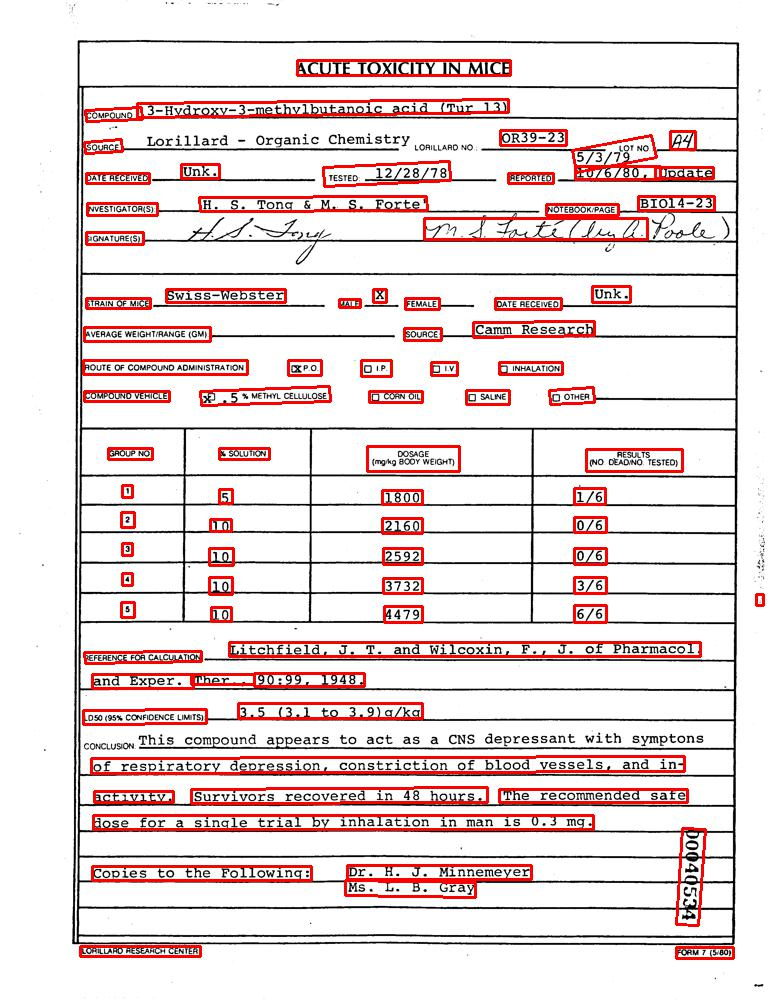

In [ ]:
img = cv2.imread('/content/result.jpg', cv2.IMREAD_UNCHANGED)
cv2_imshow(img)

In [ ]:
Acc_Box = []
Acc_cor_Box = []
Acc_ann = []
Acc_pred = []
Acc_dented_ann = []
Acc_dented_pred = []

rec_data = glob.glob(r'/content/drive/MyDrive/PaddleOCR/ip_work/training_res/text_result/*.json')
got_data = glob.glob(r'/content/drive/MyDrive/PaddleOCR/ip_work/training_data/annotations/*.json')

for z in range(len(rec_data)):

    f = open(rec_data[z], 'r')

    data = json.load(f)

    rec_texts = data['rec_texts']

    rec_scores = np.zeros(len(rec_texts))

    for i in range(len(data['rec_scores'])):
        rec_scores[i] = data['rec_scores'][i]

    rec_scores = np.nan_to_num(rec_scores)

    det_boxes = data['det_polygons']

    # print(len(rec_scores), len(rec_texts), len(det_boxes))

    # print(np.mean(rec_scores))

    # print(det_boxes)

    for i in range(len(det_boxes)):
        for j in range(len(det_boxes[i])):
            det_boxes[i][j] = int(det_boxes[i][j])

    # print(det_boxes)

    # print(det_boxes[85], det_boxes[98], det_boxes[106])

    boxes = []
    for i in range(len(det_boxes)):
        boxes.append(remove(det_boxes[i]))

    # print(boxes)

    new_boxes = []
    for i in range(len(boxes)):
        if(len(boxes[i]) == 4):
            new_boxes.append(boxes[i])
        else:
            temp = []
            for j in range(len(boxes[i])):
                t = 0
                for k in range(len(temp)):
                    if(abs(boxes[i][j] - temp[k]) <= 3):
                        t = 1
                        break
                if(t == 0):
                    temp.append(boxes[i][j])
            new_boxes.append(temp)


    # print(rec_texts)    
    # print(new_boxes)

    err_boxes = []

    for i in range(len(new_boxes)):
        if(len(new_boxes[i]) != 4):
            err_boxes.append(i)

    f.close()

    f = open(got_data[z], 'r')

    data = json.load(f)

    data = data['form']

    # print(data[36]['words'])

    giv_texts = []

    for i in range(len(data)):
        giv_texts.append(data[i]['text'])

    giv_boxes = []

    for i in range(len(data)):
        giv_boxes.append(data[i]['box'])

    f.close()

    # print(giv_texts)
    # print(giv_boxes)
    # print(err_boxes)
    # print(len(giv_texts), len(giv_boxes), len(err_boxes))

    # sort an array in ascending order
    def sort(arr):
        for i in range(len(arr)):
            for j in range(i + 1, len(arr)):
                if(arr[i] > arr[j]):
                    temp = arr[i]
                    arr[i] = arr[j]
                    arr[j] = temp
        return arr

    rec_boxes = []
    for i in range(len(new_boxes)):
        rec_boxes.append(sort(new_boxes[i]))

    got_boxes = []
    for i in range(len(giv_boxes)):
        got_boxes.append(sort(giv_boxes[i]))

    acc_actual = 0
    acc_dented = 0

    for i in range(len(rec_boxes)):
        if(i not in err_boxes):
            for j in range(len(got_boxes)):
                f1 = 0 
                f2 = 0
                f3 = 0
                f4 = 0
                if(abs(rec_boxes[i][0] - got_boxes[j][0]) <= 3):
                    f1 = 1
                if(abs(rec_boxes[i][1] - got_boxes[j][1]) <= 3):
                    f2 = 1
                if(abs(rec_boxes[i][2] - got_boxes[j][2]) <= 3):
                    f3 = 1
                if(abs(rec_boxes[i][3] - got_boxes[j][3]) <= 3):
                    f4 = 1
                if(f1 == 1 and f2 == 1 and f3 == 1 and f4 == 1):
                    if(giv_texts[j] == rec_texts[i]):
                        acc_actual += 1
                        acc_dented += 1
                    elif(abs(len(giv_texts[j]) - len(rec_texts[i])) <= 6):
                        acc_dented += 1
                    break

    # print(acc_actual, acc_dented)

    Acc_Box.append(len(rec_boxes) / len(got_boxes))
    Acc_cor_Box.append((len(rec_boxes) - len(err_boxes)) / len(got_boxes))
    Acc_ann.append(acc_actual / len(giv_texts))
    Acc_pred.append(acc_actual / len(rec_texts))
    Acc_dented_ann.append(acc_dented / len(giv_texts))
    Acc_dented_pred.append(acc_dented / len(rec_texts))

    print("File Name:", got_data[z])

    print("\nAccuracy of Boxes:", len(rec_boxes) / len(got_boxes))
    print("Accuracy of Correct Boxes:", (len(rec_boxes) - len(err_boxes)) / len(got_boxes))
    print("On Point Accuracy according to Annotations:", acc_actual / len(giv_texts))
    print("On Point Accuracy according to Predictions:", acc_actual / len(rec_texts))
    print("Accuracy of Dented Boxes according to Annotations:", acc_dented / len(giv_texts))
    print("Accuracy of Dented Boxes according to Predictions:", acc_dented / len(rec_texts))
    print("\n----------------------------------------------------------------------------------------------------------------\n")

File Name: /content/drive/MyDrive/PaddleOCR/ip_work/training_data/annotations/00093726.json

Accuracy of Boxes: 0.42391304347826086
Accuracy of Correct Boxes: 0.40217391304347827
On Point Accuracy according to Annotations: 0.0
On Point Accuracy according to Predictions: 0.0
Accuracy of Dented Boxes according to Annotations: 0.0
Accuracy of Dented Boxes according to Predictions: 0.0

----------------------------------------------------------------------------------------------------------------

File Name: /content/drive/MyDrive/PaddleOCR/ip_work/training_data/annotations/0060165115.json

Accuracy of Boxes: 1.25
Accuracy of Correct Boxes: 1.2222222222222223
On Point Accuracy according to Annotations: 0.0
On Point Accuracy according to Predictions: 0.0
Accuracy of Dented Boxes according to Annotations: 0.0
Accuracy of Dented Boxes according to Predictions: 0.0

----------------------------------------------------------------------------------------------------------------

File Name: /co

Average Accuracy of Boxes: 0.8771324136439991
Average Accuracy of Correct Boxes: 0.8430952725819222
Average On Point Accuracy according to Annotations: 0.284189804683431
Average On Point Accuracy according to Predictions: 0.3221211833973321
Average Accuracy of Dented Boxes according to Annotations: 0.5086787947460908
Average Accuracy of Dented Boxes according to Predictions: 0.5784254391575792

----------------------------------------------------------------------------------------------------------------



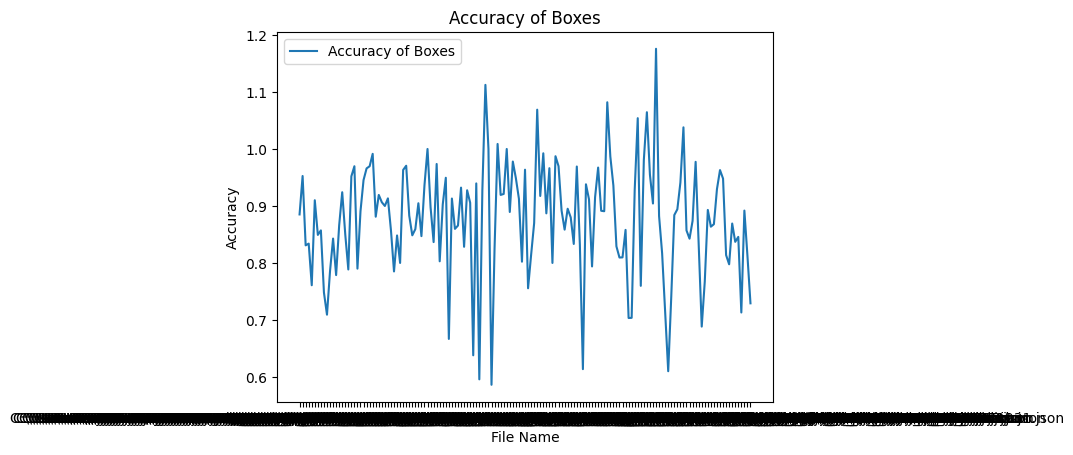

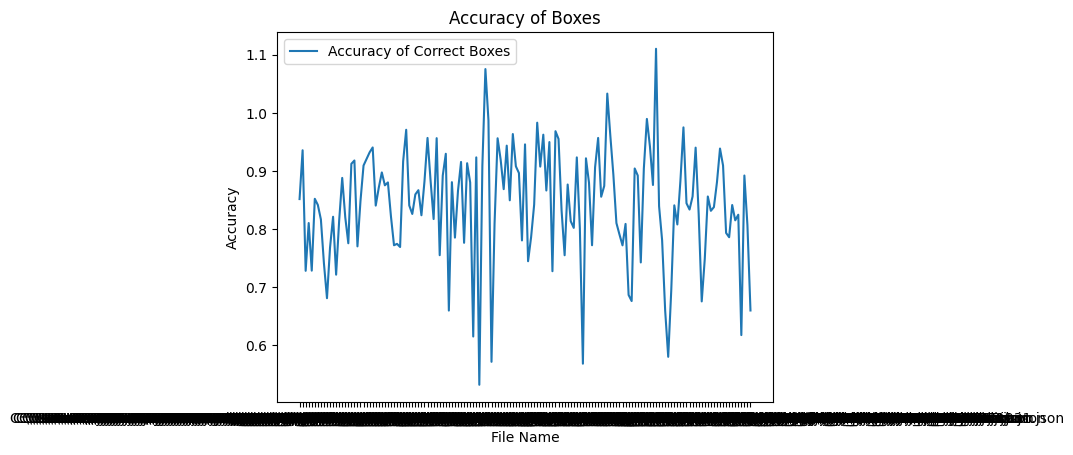

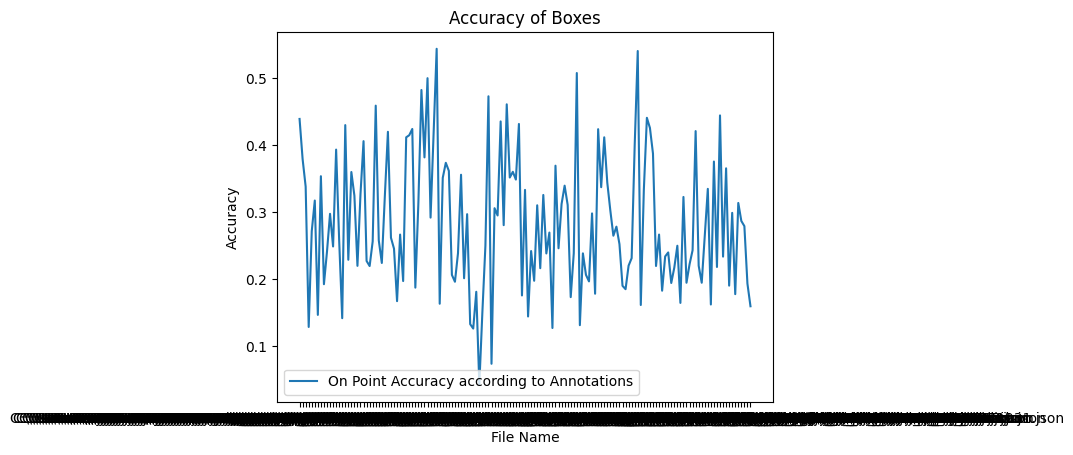

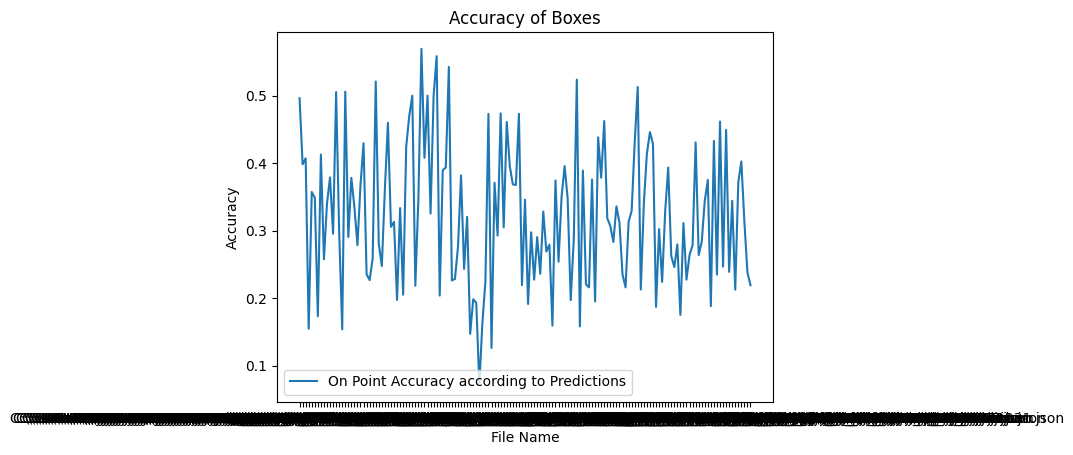

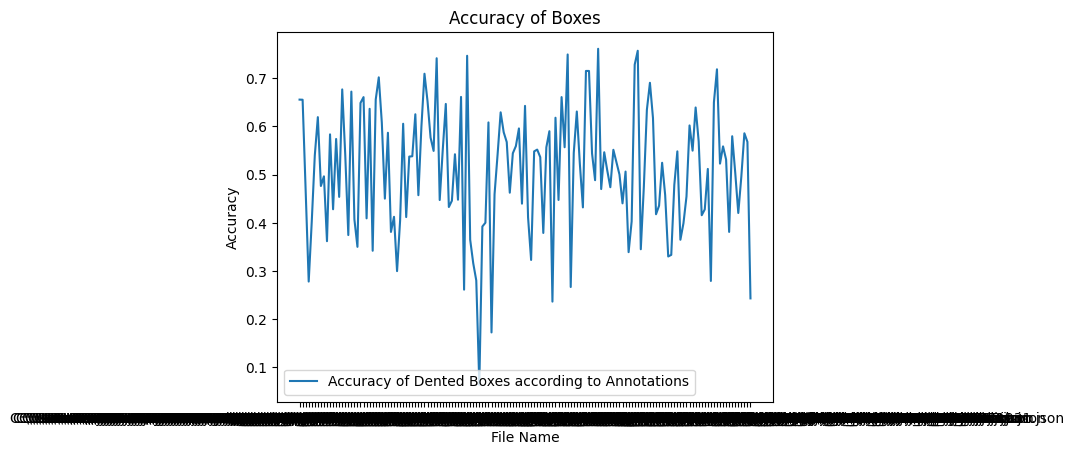

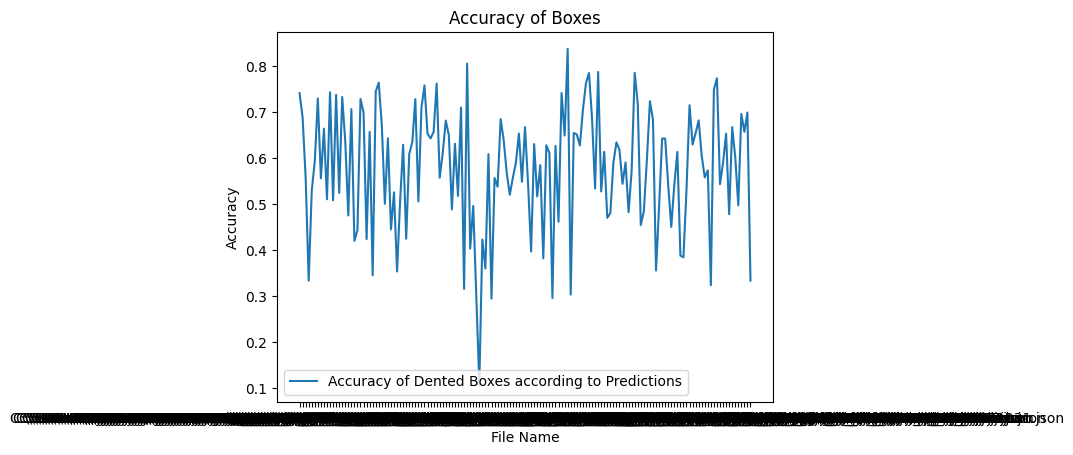

In [ ]:
print("Average Accuracy of Boxes:", np.mean(Acc_Box))
print("Average Accuracy of Correct Boxes:", np.mean(Acc_cor_Box))
print("Average On Point Accuracy according to Annotations:", np.mean(Acc_ann))
print("Average On Point Accuracy according to Predictions:", np.mean(Acc_pred))
print("Average Accuracy of Dented Boxes according to Annotations:", np.mean(Acc_dented_ann))
print("Average Accuracy of Dented Boxes according to Predictions:", np.mean(Acc_dented_pred))

print("\n----------------------------------------------------------------------------------------------------------------\n")

# plot the graph
plt.plot(got_data, Acc_Box, label = "Accuracy of Boxes")
# naming the x axis
plt.xlabel('File Name')
# naming the y axis
plt.ylabel('Accuracy')

# giving a title to my graph
plt.title('Accuracy of Boxes')

# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()
plt.plot(got_data, Acc_cor_Box, label = "Accuracy of Correct Boxes")
# naming the x axis
plt.xlabel('File Name')
# naming the y axis
plt.ylabel('Accuracy')

# giving a title to my graph
plt.title('Accuracy of Boxes')

# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()
plt.plot(got_data, Acc_ann, label = "On Point Accuracy according to Annotations")
# naming the x axis
plt.xlabel('File Name')
# naming the y axis
plt.ylabel('Accuracy')

# giving a title to my graph
plt.title('Accuracy of Boxes')

# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()
plt.plot(got_data, Acc_pred, label = "On Point Accuracy according to Predictions")
# naming the x axis
plt.xlabel('File Name')
# naming the y axis
plt.ylabel('Accuracy')

# giving a title to my graph
plt.title('Accuracy of Boxes')

# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()
plt.plot(got_data, Acc_dented_ann, label = "Accuracy of Dented Boxes according to Annotations")
# naming the x axis
plt.xlabel('File Name')
# naming the y axis
plt.ylabel('Accuracy')

# giving a title to my graph
plt.title('Accuracy of Boxes')

# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()
plt.plot(got_data, Acc_dented_pred, label = "Accuracy of Dented Boxes according to Predictions")
# naming the x axis
plt.xlabel('File Name')
# naming the y axis
plt.ylabel('Accuracy')

# giving a title to my graph
plt.title('Accuracy of Boxes')

# show a legend on the plot
plt.legend()

# function to show the plot
plt.show()

In [ ]:
# comparing raw word wise accuracy

In [ ]:
# generate machine learing model for the given data
# train the model
# test the model
# generate the accuracy of the model